In [211]:
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
import numpy as np
import math

In [213]:
x1,y1 = [], []
x2,y2 = [], []

for line in open('train.txt', 'r'):
  values = [float(s) for s in line.split()]
  if(values[2] == 1):
    x1.append(values[0])
    y1.append(values[1])

  if(values[2] == 2):
    x2.append(values[0])
    y2.append(values[1])

trainC1MeanX = np.mean(x1)
trainC1MeanY = np.mean(y1)

trainC2MeanX = np.mean(x2)
trainC2MeanY = np.mean(y2)

In [214]:
x3,y3 = [], []
x4,y4 = [], []

for line in open('test.txt', 'r'):
  values = [float(s) for s in line.split()]
  if(values[2] == 1):
    x3.append(values[0])
    y3.append(values[1])

  if(values[2] == 2):
    x4.append(values[0])
    y4.append(values[1])


[-4. -3. -2. -1.  0.  1.  2.  3.]


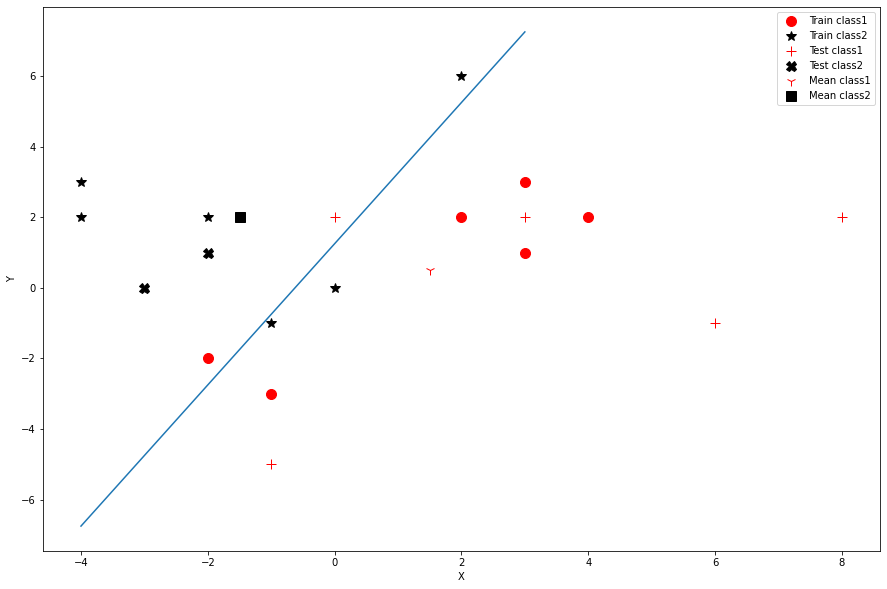

In [234]:
plt.figure(figsize=(15, 10))

#for train 
red_dot, = plt.plot(x1,y1,'ro',markersize = 10) # red dot
blk_str, = plt.plot(x2,y2,'ok',marker='*',markersize=10) # black *



#for test
redPls, = plt.plot(x3,y3,'ro',marker='+',markersize=10) #red +
blkX, = plt.plot(x4,y4,'ok',marker='X',markersize=10)#black x


#for mean
meanCls1, = plt.plot(trainC1MeanX,trainC1MeanY,'ro',marker='1',markersize=10) #red Y
meanCls2, = plt.plot(trainC2MeanX,trainC2MeanY,'ok',marker='s',markersize=10)#black squre


plt.xlabel("X") 
plt.ylabel("Y")

plt.legend([red_dot, blk_str,redPls, blkX,meanCls1,meanCls2], ["Train class1", "Train class2",'Test class1','Test class2','Mean class1','Mean class2'])
#plt.legend([red_dot, blk_str,redPls, blkX], ["Train class1", "Train class2",'Test class1','Test class2'])


#draw decision boundary

trainX = x1 + x2

xDiff = trainC1MeanX - trainC2MeanX
yDiff = trainC1MeanY - trainC2MeanY

trainXMin = min(trainX)
trainXMax = max(trainX)

#diff = trainXMax - trainXMin
#print(diff)
#for i in range(int(diff)):

rang = np.arange(trainXMin,trainXMax,1)
print(rang)
x,y = [],[]

for i in rang: 
    #print(i)
    x.append(i)
    c = (0.5 * ((math.pow(trainC1MeanX,2) + math.pow(trainC1MeanY,2)) - (math.pow(trainC2MeanX,2) + math.pow(trainC2MeanY,2))) 
         - (i * xDiff)) / yDiff;
    y.append(c)
    #print(y)

plt.plot(x, y)

plt.plot()
plt.show()



In [233]:
#Find accuracy. # using euclidean distance

test = np.loadtxt('test.txt')
#print(test)

classified = 0
for i in test:
    #print(i)
    try:
        d1 = math.sqrt( math.pow((i[0] - trainC1MeanX), 2) + math.pow((i[1] - trainC1MeanY), 2) )
        d2 = math.sqrt( math.pow((i[0] - trainC2MeanX), 2) + math.pow((i[1] - trainC2MeanY), 2) )
        
        if(d1 < d2 and i[2] == 1):
            classified = classified + 1
        if(d1>d2 and i[2] == 2):
            classified = classified + 1
    except ValueError:
        print ("negative data")

lnth = len(test)
accuracy = classified*100/lnth

print("Accuracy = " ,str(accuracy))



Accuracy =  85.71428571428571
